In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import emoji
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

In [55]:
df = pd.read_csv('/home/sarath_kumar/NLP_PRETRAINED/data/IMDB-Movie-Reviews.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Data Preprocessing

In [ ]:

# Make sure to download stopwords if not already done


# Define a set of stopwords
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans the input text or a pandas Series by removing HTML tags, URLs, stopwords, emojis,
    punctuation, and converting to lowercase.

    Args:
        text (str or pd.Series): The input text or pandas Series to be cleaned.

    Returns:
        str or pd.Series: The cleaned text or pandas Series.
    """
    try:
        text = BeautifulSoup(text, "html.parser").get_text()
        text = re.sub(r'http\S+|www\.\S+', '', text)
        text = emoji.replace_emoji(text, replace="")
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.lower()
        words = text.split()
        words = [word for word in words if word not in STOPWORDS]
        text = ' '.join(words)
        return text

    except :
         
        text = text.str.replace(r'<.*?>', '', regex=True) 
        text = text.str.replace(r'http\S+|www\.\S+', '', regex=True)  
        text = text.str.translate(str.maketrans('', '', string.punctuation)) 
        text = text.str.lower() 
        text = text.str.split().apply(lambda words: ' '.join([word for word in words if word not in STOPWORDS]))
        return text
        


In [57]:
df['cleaned_review'] = clean_text(df['review'])
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [58]:
df.drop(['review'],axis = 1, inplace = True)

In [59]:
df.head()

,sentiment,cleaned_review
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically theres family little boy jake thinks...
4,positive,petter matteis love time money visually stunni...


In [60]:
import seaborn as sns

### Data Visualization

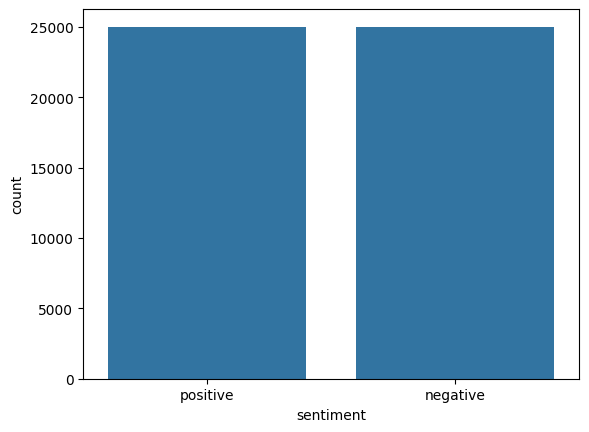

In [61]:
sns.countplot(x=df['sentiment'])
plt.show()

In [ ]:
def generate_wordclouds(positive_reviews, negative_reviews):
    """
    Generates and displays word clouds for positive and negative reviews.

    Args:
        positive_reviews (list or pd.Series): A list or pandas Series of positive reviews.
        negative_reviews (list or pd.Series): A list or pandas Series of negative reviews.
    """
    try:
        # Combine all positive reviews into a single string
        positive_text = ' '.join(positive_reviews)

        # Combine all negative reviews into a single string
        negative_text = ' '.join(negative_reviews)

        # Generate word cloud for positive reviews
        positive_wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white', 
            colormap='Greens'
        ).generate(positive_text)

        # Generate word cloud for negative reviews
        negative_wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white', 
            colormap='Reds'
        ).generate(negative_text)

        # Plot the word clouds
        plt.figure(figsize=(14, 7))

        # Positive word cloud
        plt.subplot(1, 2, 1)
        plt.imshow(positive_wordcloud, interpolation='bilinear')
        plt.title("Positive Reviews", fontsize=16)
        plt.axis("off")

        # Negative word cloud
        plt.subplot(1, 2, 2)
        plt.imshow(negative_wordcloud, interpolation='bilinear')
        plt.title("Negative Reviews", fontsize=16)
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred while generating word clouds: {e}")


In [63]:
positive_reviews = df.loc[df['sentiment']=='positive']['cleaned_review']
negative_reviews = df.loc[df['sentiment']=='negative']['cleaned_review']

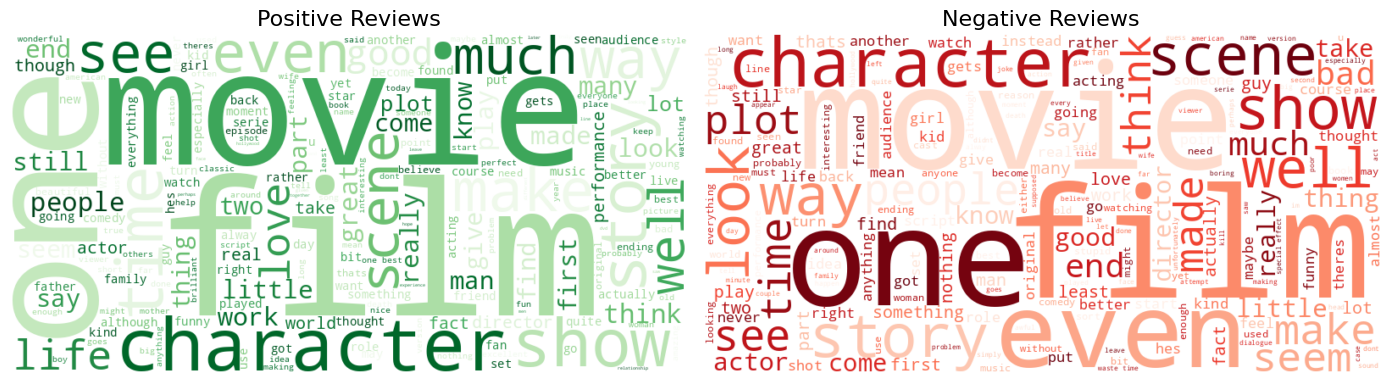

In [64]:
generate_wordclouds(positive_reviews,negative_reviews)

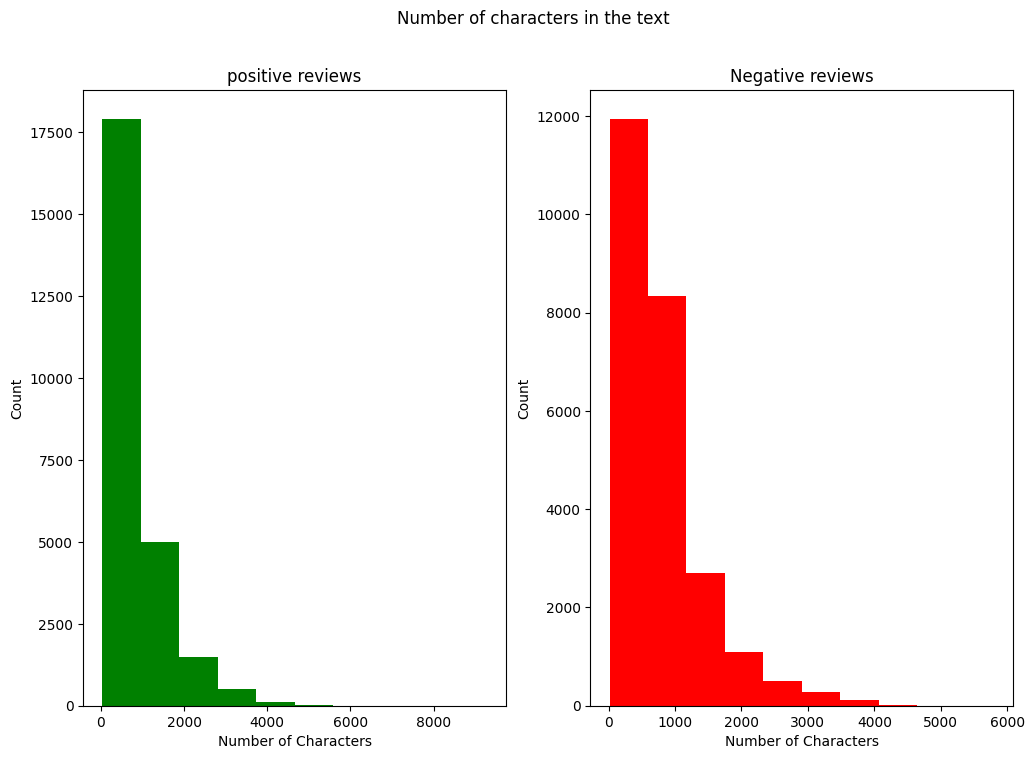

In [65]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
pos_text_len = positive_reviews.str.len()
ax1.hist(pos_text_len,color='green')
ax1.set_title("positive reviews")
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel("Count")

neg_text_len = negative_reviews.str.len()

ax2.hist(neg_text_len,color= 'red')
ax2.set_title("Negative reviews")
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel("Count")
fig.suptitle("Number of characters in the text")
plt.show()

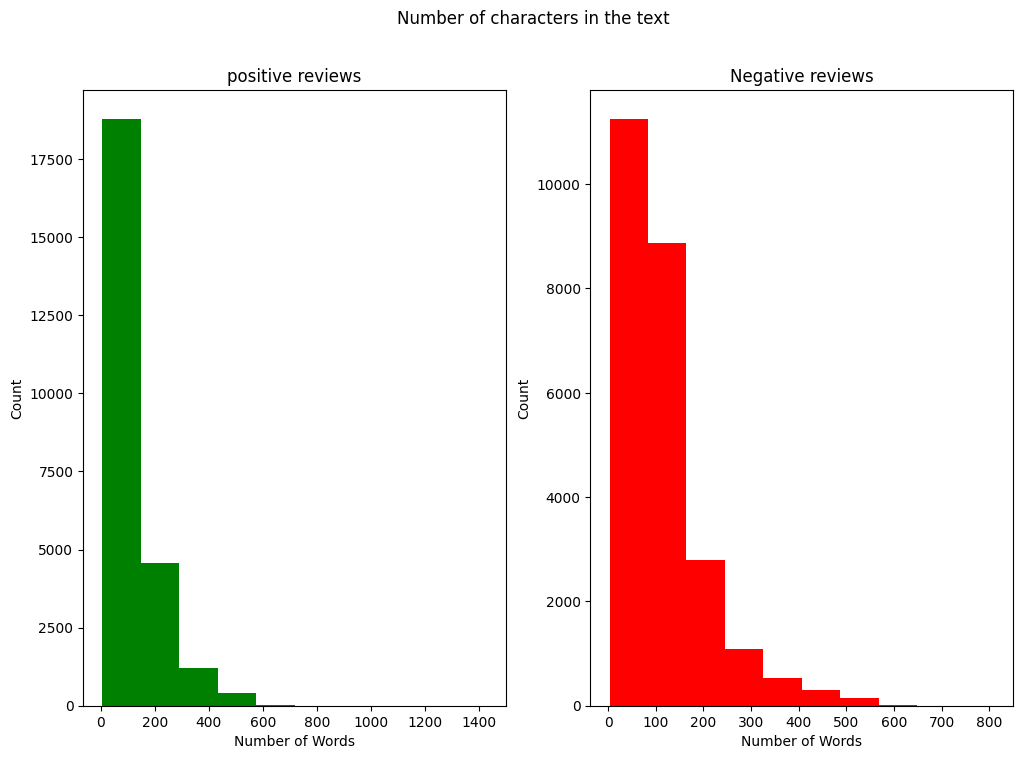

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
pos_text_len = positive_reviews.str.split().map(lambda x:len(x))
ax1.hist(pos_text_len,color='green')
ax1.set_title("positive reviews")
ax1.set_xlabel('Number of Words')
ax1.set_ylabel("Count")

neg_text_len = negative_reviews.str.split().map(lambda x:len(x))

ax2.hist(neg_text_len,color= 'red')
ax2.set_title("Negative reviews")
ax2.set_xlabel('Number of Words')
ax2.set_ylabel("Count")
fig.suptitle("Number of characters in the text")
plt.show()

In [67]:
def get_corpus(text):
    word = []
    for i in text:
        for j in i.split():
            word.append(j.strip())
    return word


In [68]:
corpus = get_corpus(df['cleaned_review'])

In [69]:
corpus[:5]

['one', 'reviewers', 'mentioned', 'watching', '1']

In [71]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = pd.DataFrame(most_common,columns = ['Corpus','Count'])
most_common

,Corpus,Count
0,movie,83506
1,film,74462
2,one,50366
3,like,38825
4,good,28483
5,even,24280
6,would,24001
7,time,23265
8,really,22894
9,see,22432


In [74]:
most_common = most_common.sort_values('Count')

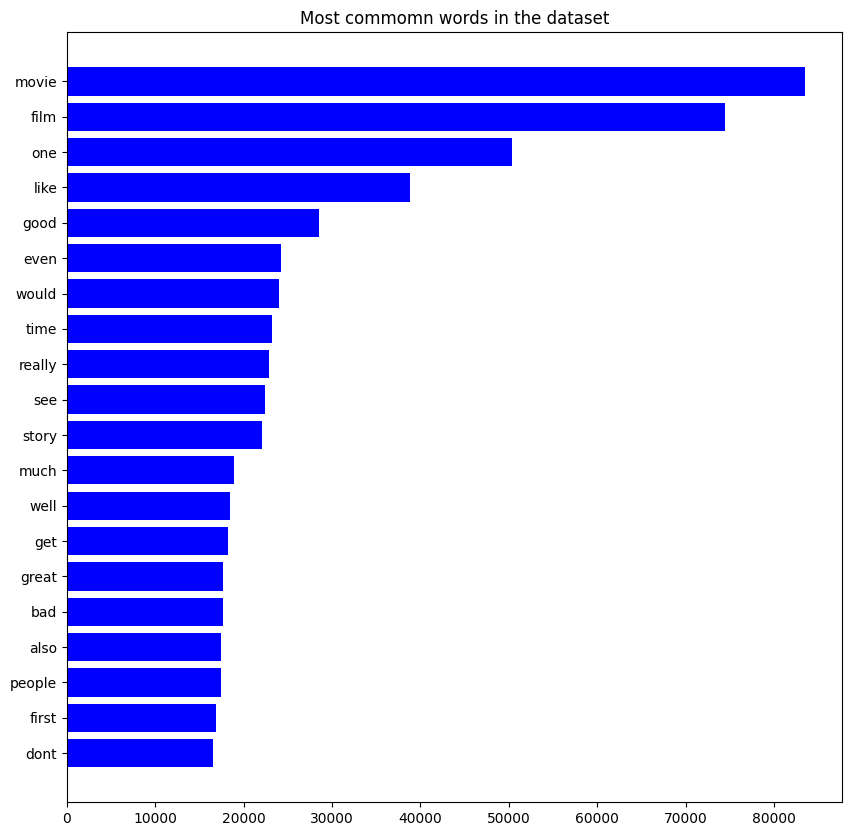

In [75]:
plt.figure(figsize=(10,10))
plt.yticks(range(len(most_common)),list(most_common.Corpus))
plt.barh(range(len(most_common)),list(most_common.Count),align= 'center',color='blue')
plt.title("Most commomn words in the dataset")
plt.show()